In [109]:
# Add Matplotlib inline magic
%matplotlib inline
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [2]:
#Files to load
city_data_to_load = os.path.join('Resources' , 'city_data.csv')
ride_data_to_load = os.path.join('Resources' , 'ride_data.csv')
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [3]:
# Count Null Columns
city_data_df.isnull().sum()
ride_data_df.isnull().sum()
#zero nulls in all columns both sheets

#determine data types
city_data_df.dtypes
ride_data_df.dtypes

# count city numbers
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [4]:
# Count Urban Cities
sum(city_data_df['type'] == 'Rural')

18

In [5]:
pyber_data_df = pd.merge(ride_data_df , city_data_df , how='left' , on = ['city' , 'city'])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [6]:
# Create each city type DataFrame
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']

In [7]:
# Get ride count per city type
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [8]:
# Get avergae fare per city
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [9]:
# Get driver count for each city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

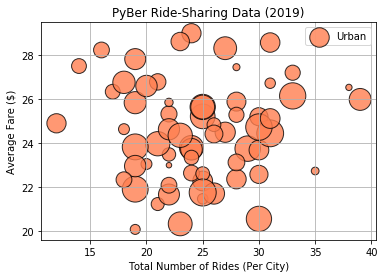

In [22]:
# Create Urban Plot
plt.scatter(urban_ride_count , 
            urban_avg_fare , 
            s=[i * 10 for i in urban_driver_count] , 
            label='Urban' , 
            color='coral' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend()

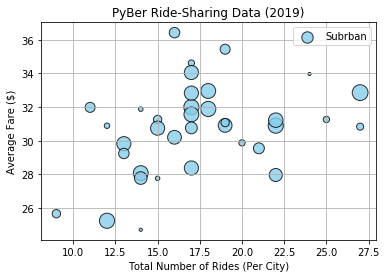

In [23]:
# Create suburban Plot
plt.scatter(suburban_ride_count , 
            suburban_avg_fare , 
            s=[i * 10 for i in suburban_driver_count] , 
            label='Subrban' , 
            color='skyblue' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend()

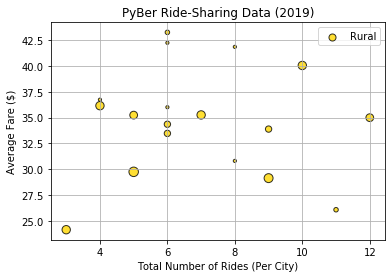

In [25]:
# Create Rural Plot
plt.scatter(rural_ride_count , 
            rural_avg_fare , 
            s=[i * 10 for i in rural_driver_count] , 
            label='Rural' , 
            color='gold' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend()

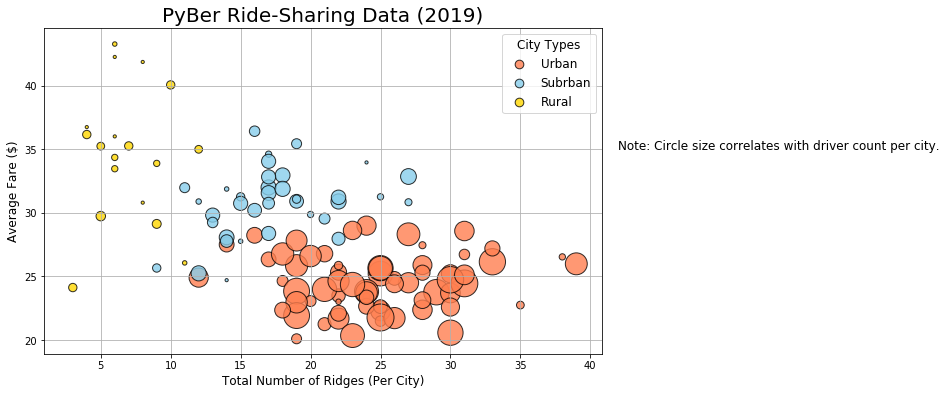

In [36]:
# Combine plots
plt.subplots(figsize = (10, 6))

#Urban
plt.scatter(urban_ride_count , 
            urban_avg_fare , 
            s=[i * 10 for i in urban_driver_count] , 
            label='Urban' , 
            color='coral' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)

# Suburban
plt.scatter(suburban_ride_count , 
            suburban_avg_fare , 
            s=[i * 10 for i in suburban_driver_count] , 
            label='Subrban' , 
            color='skyblue' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)

# Rural
plt.scatter(rural_ride_count , 
            rural_avg_fare , 
            s=[i * 10 for i in rural_driver_count] , 
            label='Rural' , 
            color='gold' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)

# Other graph properties
plt.title('PyBer Ride-Sharing Data (2019)' , fontsize=20)
plt.ylabel('Average Fare ($)' , fontsize = 12)
plt.xlabel('Total Number of Ridges (Per City)' , fontsize = 12)
plt.grid(True)


# Add in legend
lgnd = plt.legend(fontsize=12 , mode='Expanded' , scatterpoints=1, loc='best' , title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Text label about circle size
plt.text(42, 35 , 'Note: Circle size correlates with driver count per city.' , fontsize=12)

# Save the figure
plt.savefig('Analysis\Fig1.png')

# Show
plt.show()

In [37]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [38]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [39]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [40]:
# Get summary stats
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [41]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [42]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [43]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2) , round(suburban_ride_count.mean() , 2) , round(rural_ride_count.mean() , 2)

(24.62, 17.36, 6.94)

In [45]:
suburban_ride_count.mode()

0    17
dtype: int64

In [52]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [56]:
# Get the fares for each city type
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [54]:
# Calculate measures of central tendency for average fore for urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [57]:
# Calculate measures of central tendency for average fore for suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [58]:
# Calculate measures of central tendency for average fore for rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [59]:
# Get driver count data for each city type
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [69]:
# Calculate measures of central tendency for average fore for urban cities
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
print(
    f'Mean: {mean_urban_drivers:.2f} \n'
    f'Median: {median_urban_drivers:.2f} \n'
    f'Mode: {mode_urban_drivers}')

Mean: 36.68 
Median: 37.00 
Mode: ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [70]:
# Calculate measures of central tendency for average fore for suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
print(
    f'Mean: {mean_suburban_drivers:.2f} \n'
    f'Median: {median_suburban_drivers:.2f} \n'
    f'Mode: {mode_suburban_drivers}')

Mean: 13.71 
Median: 16.00 
Mode: ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [68]:
# Calculate measures of central tendency for average fore for rural cities
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(
    f'Mean: {mean_rural_drivers:.2f} \n'
    f'Median: {median_rural_drivers:.2f} \n'
    f'Mode: {mode_rural_drivers}')

Mean: 4.30 
Median: 4.00 
Mode: ModeResult(mode=array([1], dtype=int64), count=array([32]))


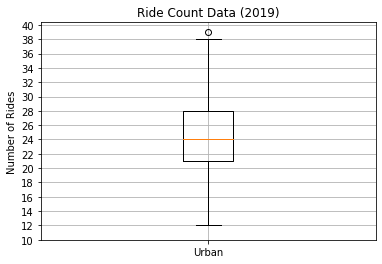

In [71]:
# Create a box-and-whisker plot for urban cities ride count
x_labels = ['Urban']
fig , ax = plt.subplots()
ax.boxplot(urban_ride_count , labels = x_labels)

# Add title, y-axix label + grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

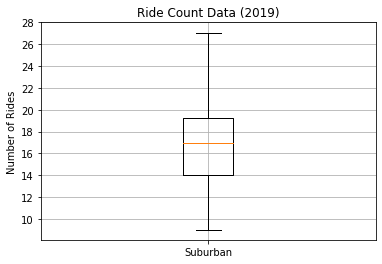

In [75]:
# Create a box-and-whisker plot for urban cities ride count
x_labels = ['Suburban']
fig , ax = plt.subplots()
ax.boxplot(suburban_ride_count , labels = x_labels)

# Add title, y-axix label + grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 30, step=2.0))
ax.grid()
plt.show()

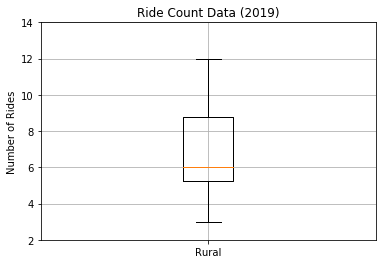

In [78]:
# Create a box-and-whisker plot for urban cities ride count
x_labels = ['Rural']
fig , ax = plt.subplots()
ax.boxplot(rural_ride_count , labels = x_labels)

# Add title, y-axix label + grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2, 15, step=2.0))
ax.grid()
plt.show()

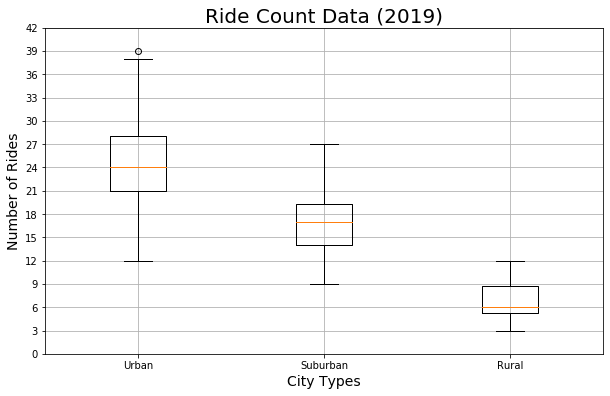

In [79]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [81]:
# Find Outlier
# Get city that has 39 as value
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


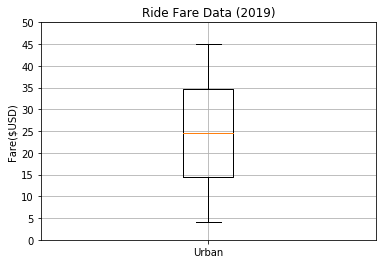

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [82]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

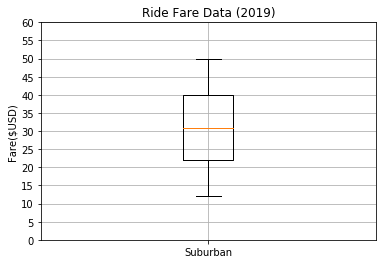

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [87]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

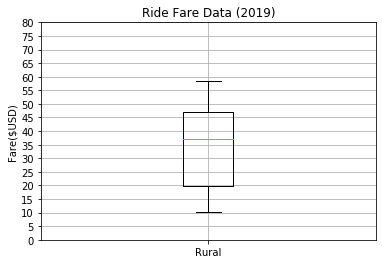

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [88]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 81, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

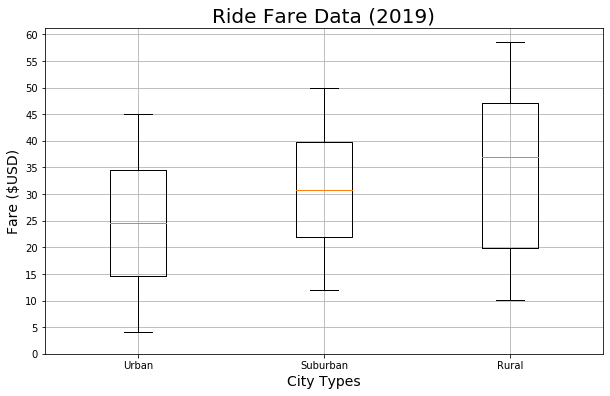

In [101]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

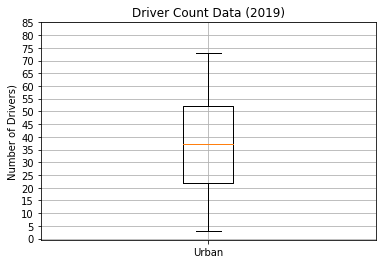

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [90]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

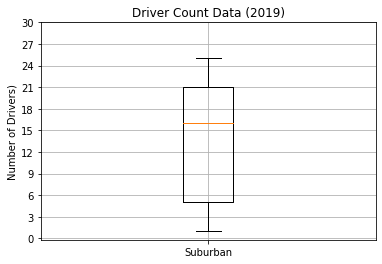

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [97]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 31, step=3.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

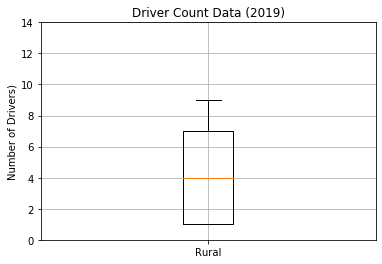

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [96]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 16, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

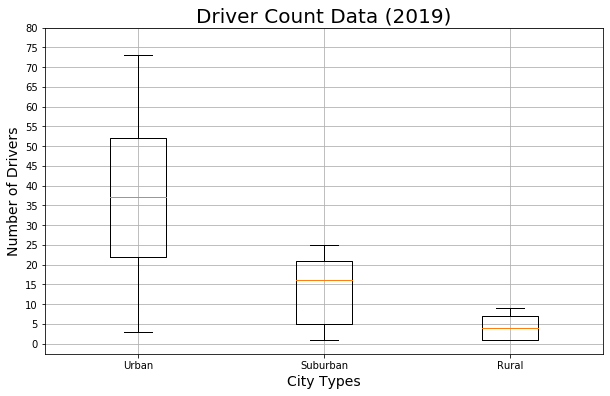

In [102]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 81, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [103]:
# Get the sum of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [104]:
# Get the total sum of all fares
total_fares = pyber_data_df.sum()['fare']
total_fares

63538.64000000014

In [105]:
# calculate each city type's fare percent
type_percents = sum_fares_by_type / total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [106]:
# ^ or the same as the previous 3 steps on 1 line
type_percentages = pyber_data_df.groupby(['type']).sum()['fare'] / pyber_data_df.sum()['fare'] * 100
type_percentages

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

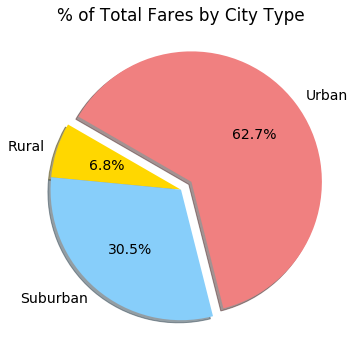

In [113]:
plt.subplots(figsize=(10,6))
plt.pie(
    type_percents , 
    labels=['Rural' , 'Suburban' , 'Urban'],
    colors=['gold','lightskyblue','lightcoral'],
    explode=[0,0,0.1],
    autopct='%1.1f%%',
    shadow=True,
    startangle=150)
plt.title('% of Total Fares by City Type')

# Change default font size
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig('Analysis/Fig5.png')
plt.show()